# Project 3: Exploratory Data Analysis and Visualization
## Cloudy with chance of Fresh Produce

The purpose of this exercise to learn the concepts of Exploratory Data Analysis and Visualization on two different types of data sets: Climate Change and Worldwide Food Production. We will use global climate change and food production data to plot some interesting visualizations which include correlation between latitude and temperature, time series plot of temperature across different regions through time, comparison of average temperatures across countries/states, and average food production across countries.

There are six plotting questions in this project, which are manually graded after the submission deadline. Each question has an associated grading rubric that you can stick to. In addition to the rubric points, make sure that every component of your graph is legible; there should be no overlap between any labels or titles. Furthermore, all the graphs should be visible in this notebook file when you submit to Sail(), so that the TAs can see the graphs **without having to manually run your code**. Any plotting question without a visible output graph will receive a score of 0/30 for the manual grading component.

<p style="color:red;">In addition, make sure you have installed the package versions as specified in <tt>requirements.txt</tt>. Using an older Pandas version may lead to different results from the local tests.</p>

### Data Description

- [Climate Change: Earth Surface Temperature Data](http://berkeleyearth.org/data/): A compilation of data put together by the Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. The Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports from 16 existing archives.
- [Worldwide Food Production Data](http://www.fao.org/faostat/en/#home): The Food and Agriculture Organization of the United Nations provides free access to food and agriculture data for over 245 countries and territories, from the year 1961 to the most recent year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import seaborn as sns
import time
import argparse
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
# this cell has been tagged with excluded_from_script
# you do not need to remove it when submitting
%matplotlib inline

In [3]:
# Apply Seaborn default theme with ticks
sns.set(style="ticks")

## Part A: Visualizing Climate Change
We will analyze the data to see how temperature has changed over time. Let's first start by loading the datasets.

In [4]:
df_country = pd.read_csv("input/GlobalLandTemperaturesByCountry.csv")
df_global = pd.read_csv("input/GlobalTemperatures.csv")

We can understand the scope of our data by viewing the summary statistics such as min value, max value, average, std. deviation etc. What is the average temperature recorded across the world? 

In [5]:
# this cell has been tagged with excluded_from_script
# it will not be run by the autograder
print(df_country.columns)
display(df_country.head())
display(df_country.describe())

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')


dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland

AverageTemperature  AverageTemperatureUncertainty
count       544811.000000                  545550.000000
mean            17.193354                       1.019057
std             10.953966                       1.201930
min            -37.658000                       0.052000
25%             10.025000                       0.323000
50%             20.901000                       0.571000
75%             25.814000                       1.206000
max             38.842000                      15.003000

In [6]:
# this cell has been tagged with excluded_from_script
# it will not be run by the autograder
print(df_global.columns)
display(df_global.head())
display(df_global.describe())

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')


dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

LandAverageTemperature  LandAverageTemperatureUncertainty  \
count             3180.000000                        3180.000000   
mean                 8.374731                           0.938468   
std                  4.381310                           1.096440   
min                 -2.080000                           0.034000   
25%                  4.312000                           0.186750   
50%                  8.610500                           0.392000   
75%                 12.548250                           1.419250   
max                 19.021000                           7.880000   

       LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
count         1992.000000                    1992.000000         1992.000000   
mean            14.350601                       0.479782            2.743595   
std              4.309579                       0.583203            4.155835   
min              5.900000                       0.044000           -5.407000   
25%             10.212000                       0.142000           -1.334500   
50%             14.760000                       0.252000            2.949500   
75%             18.451500                       0.539000            6.778750   
max             21.320000                       4.373000            9.715000   

       LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
count                    1992.000000                     1992.000000   
mean                        0.431849                       15.212566   
std                         0.445838                        1.274093   
min                         0.045000                       12.475000   
25%                         0.155000                       14.047000   
50%                         0.279000                       15.251000   
75%                         0.458250                       16.396250   
max                         3.498000                       17.611000   

       LandAndOceanAverageTemperatureUncertainty  
count                                1992.000000  
mean                                    0.128532  
std                                     0.073587  
min                                     0.042000  
25%                                     0.063000  
50%                                     0.122000  
75%                                     0.151000  
max                                     0.457000

Before we begin, keep in mind that you **should not directly modify the two global variables above** (not even adding new columns). The autograder grades each question independently, so do not assume that any change you make to these global variables in question 1 will be present when question 8 is graded. Instead, only work with the provided parameters in each function.

### Question 1: Temperature data cleaning
The first step in investigating any dataset is to clean and preprocess the data. Different types of anomaly can arise during the data collection or curation process, and we need to address them before performing any anaysis.

Implement the function `preprocess_countries` that does the followings:
1. Certain country names include their affiliations, e.g., `"Falkland Islands (Islas Malvinas)"`; simplify these names so that only the actual country name remains. More generally, any country name of the form `"name1 (name2)"` should be replaced with `"name1"`.
1. Remove the countries without temperature information. The list of such countries is provided in the variable `countries_to_remove`.

In [7]:
countries_to_remove = ['Denmark', 'Antarctica', 'France', 'Europe',
    'Netherlands','United Kingdom', 'Africa', 'South America']

def preprocess_countries(country_data):
    """
    Remove countries without temperature information from the input dataframe
    and simplify the country names that also include continent names.
    
    kwargs:
        country_data (pd.DataFrame) : the input dataframe to preprocess
    
    return:
        pd.DataFrame : the preprocessed dataframe
    """
    def pre_process_country(name: str):
        cname_regex = re.compile(r"(.*)\s\(.*\)")
        match = re.match(cname_regex, name)
        return match.group(1) if match else name
    
    countries_df = country_data.copy()
    countries_df["Country"] = countries_df["Country"].apply(pre_process_country)
    countries_df = countries_df[~countries_df["Country"].isin(countries_to_remove)]
    return countries_df

In [8]:
def test_preprocess_countries():
    df_country_cleaned = preprocess_countries(df_country.copy())
    assert df_country_cleaned.columns.equals(df_country.columns)
    assert df_country_cleaned.dtypes.equals(df_country.dtypes)
    assert len(df_country_cleaned) == 544579
    
    unique_countries = df_country_cleaned["Country"].unique()
    assert len(unique_countries) == 230
    assert 'Congo' in unique_countries
    assert 'Denmark' not in unique_countries
    print("All tests passed!")

test_preprocess_countries()

All tests passed!


Next, we will remove the rows with missing value in our datasets. Missing values can create several problems when analysing data and the simplest way to handle this is to delete rows that have at least one missing value. Implement the function `drop_missing_values` that applies this step to a given dataframe, which in our case is the country and global temperature data.

In [9]:
def drop_missing_values(df):
    """
    Drop rows with at least one missing value from an input dataframe.
    
    args:
        df (pd.DataFrame) : an input dataframe
    
    returns:
        pd.DataFrame : a subset of df where rows with missing values in any column are removed.
    """
    return df.dropna()

In [10]:
def test_drop_missing_values():
    df_country_filtered = drop_missing_values(preprocess_countries(df_country.copy()))
    df_global_filtered = drop_missing_values(df_global)
    assert df_country_filtered.columns.equals(df_country.columns)
    assert df_country_filtered.dtypes.equals(df_country.dtypes)
    assert len(df_country_filtered) == 513349
    
    assert df_global_filtered.columns.equals(df_global.columns)
    assert df_global_filtered.dtypes.equals(df_global.dtypes)
    assert len(df_global_filtered) == 1992
    print("All tests passed!")

test_drop_missing_values()

All tests passed!


### Question 2: Temperature outlier detection

Next, let's plot the temperature distribution in both of these data frames. We will be looking for whether any outlier exists. Implement the function `plot_temperature` that constructs the boxplot for two groups: the `AverageTemperature` column in `df_country` and the `LandAverageTemperature` column in `df_global`, and return two series of the specified data points.

---
**Plot rubric**

This question is manually graded. Your box plot should meet the following requirements:
* (1 point) The x-axis should have two groups labeled as "Average Country Temperature" and "Average Global Temperature."
* (1 point) The y-axis should cover the full temperature range in both datasets. It should be labeled as "Average Temperature (C)"
* (1 point) The bars for the minimum (excluding outliers), maximum (excluding outliers), median, first quartile and third quartile values in each group should be visible.
* (2 points) The outlier points should be visible and have correct values.

Here is the sample solution boxplot that you could try to replicate: [plot_temperature.png](http://clouddatascience.blob.core.windows.net/m20-foundation-data-science/p2-domain-analysis-exploration/plots/plot_temperature.png).

---

In [11]:
def plot_temperature(df_country_filtered, df_global_filtered):
    """
    Generate the box plots of the average temperature values in the country and global temperature dataset.
    
    args:
        df_country_filtered (pd.DataFrame) : the dataframe of temperature by country with country names
            filtered and empty rows removed
        df_global_filtered (pd.DataFrame) : the dataframe of global temperature with empty rows removed
    
    returns:
        Tuple(country_average, global_average)
            country_average (pd.Series) : all the data points in the AverageTemperature column (first group)
            global_average (pd.Series) : all the data points in the LandAverageTemperature column (second group)
    """
    y_country, y_global = df_country_filtered["AverageTemperature"], df_global_filtered["LandAverageTemperature"]
    df1 = pd.DataFrame({"type": ["Average Country Temperature"] * len(df_country_filtered), "Average Temperature (C)": y_country})
    df2 = pd.DataFrame({"type": ["Average Global Temperature"] * len(df_global_filtered), "Average Temperature (C)": y_global})
    
    p = sns.catplot(kind="box", x="type", y="Average Temperature (C)", data=pd.concat([df1, df2]), palette="light:#fff")
    p.set(xlabel="")
    p.fig.set_figheight(10)
    p.fig.set_figwidth(10)
    plt.grid()
    
    return y_country, y_global

All test cases passed!


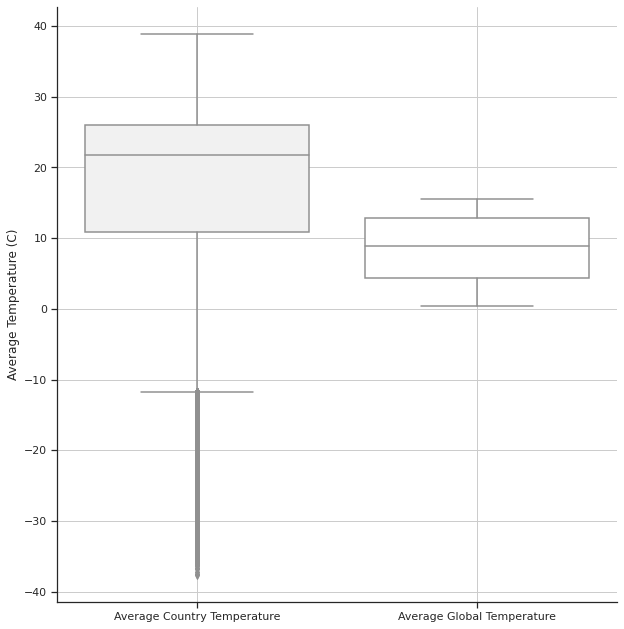

In [12]:
def test_plot_temperature():
    df_country_filtered = drop_missing_values(preprocess_countries(df_country))
    df_global_filtered = drop_missing_values(df_global)
    pw_country, pw_global = plot_temperature(df_country_filtered, df_global_filtered)
    assert pw_country.max() == 38.842
    assert pw_global.max()  == 15.482
    print("All test cases passed!")

test_plot_temperature()

We see that the `Average Global Temperature` group looks fine, but `Average Temperature for Countries` does have some outliers that are much lower than the rest of the data. A rule of thumb for identifying outliers is the [IQR rule](https://en.wikipedia.org/wiki/Interquartile_range): a data point is considered outlier if it is at least 1.5 interquartile ranges below the first quartile (Q1), or at least 1.5 interquartile ranges above the third quartile (Q3), i.e.,

$$\text{outlier} \le Q1 - 1.5 \times IQR \text{ OR } \text{outlier} \ge Q3 + 1.5 \times IQR.$$

Implement the function `remove_outliers` that removes rows from a dataframe whose value at a given column is considered outlier according to the IQR rule. We will then apply this function to the column `AverageTemperature` in our preprocessed `df_country`.

**Notes**:
* Make sure you use the same pandas version as specified in `requirements.txt`; otherwise your local test outputs may be different.

In [13]:
def remove_outliers(df, col):
    """
    Remove any row whose data at a given column is considered outlier according to the IQR rule.
    
    args:
        df (pd.DataFrame) : an input dataframe where outlier rows should be removed
        col (str) : the column name to check for outlier
    
    return:
        pd.DataFrame : a subset of the input dataframe after outlier rows are removed
    """
    q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return df[df[col].between(lower, upper)]

In [14]:
def test_remove_outliers():
    dfc = drop_missing_values(preprocess_countries(df_country.copy()))
    df_country_new = remove_outliers(dfc, "AverageTemperature")
    assert dfc.columns.equals(df_country.columns)
    assert dfc.dtypes.equals(df_country.dtypes)
    assert len(df_country_new) == 506596
    assert abs(df_country_new["AverageTemperature"].min() + 11.68) < 0.01
    assert abs(df_country_new["AverageTemperature"].max() - 38.84) < 0.01
    assert abs(df_country_new["AverageTemperature"].mean() - 18.18) < 0.01
    print("All tests passed!")

test_remove_outliers()

All tests passed!


We can now create a function that combines all the preprocessing steps to quickly get the preprocessed data for subsequent analyses.

In [15]:
def get_preprocessed_data(country_data = True, global_data = True):
    # get only global data
    if not country_data:
        return drop_missing_values(df_global)
    # get only country data
    if not global_data:
        dfc = drop_missing_values(preprocess_countries(df_country.copy()))
        dfc = remove_outliers(dfc, "AverageTemperature")
        return dfc
    # get both data
    dfc = drop_missing_values(preprocess_countries(df_country.copy()))
    dfc = remove_outliers(dfc, "AverageTemperature")
    dfg = drop_missing_values(df_global)
    return dfc, dfg

### Question 3: Temperature data visualization
The following exercises will get you familiar with the visual vocabulary introduced in the primer, so that you can get a good understanding of which visualization to use in which scenario. As a start, we will explore different visualizations for the average temperature by country over time. Implement the function `avg_temp_by_country` that takes as input the cleaned `df_country` dataframe, and computes the average temperature in each country across all the months where temperature data for that country is available.

**Note**:
* You should perform data aggregation over the `AverageTemperature` column.

In [16]:
def avg_temp_by_country(df_country):
    """
    Compute the average temperature in each country and order the countries by average temperatures from high to low.
    
    args:
        df_country (pd.DataFrame) : preprocessed data frame of temperatures across countries
    
    return:
        pd.Series : a descending series of average temperature values, indexed by country
    """
    res_df = df_country.groupby(["Country"]).agg({"AverageTemperature": np.mean}).sort_values(by = ["AverageTemperature"], ascending = False)
    return res_df["AverageTemperature"]

In [17]:
def test_avg_temp_by_country():
    dfc = get_preprocessed_data(global_data = False)
    average_temps = avg_temp_by_country(dfc)
    assert average_temps.name == "AverageTemperature"
    assert list(average_temps.index[:5]) == ["Djibouti", "Mali", "Burkina Faso", "Senegal", "Aruba"]
    assert list(average_temps.index[-5:]) == ['Iceland', 'South Georgia And The South Sandwich Isla', 'Norway',
       'Svalbard And Jan Mayen', 'Greenland']
    assert average_temps.dtype == np.float64
    
    assert len(average_temps) == 230
    assert abs(average_temps["Albania"] - 12.61) < 0.01
    assert abs(average_temps["China"] - 6.62) < 0.01
    print("All tests passed!")

test_avg_temp_by_country()

All tests passed!


#### Average Temperature by Countries (Map Chart)

We can now plot the average temperatures across countries on a map chart. This will provide a quick snapshot of country-wise temperatures and allow us to make suitable comparisons. We will provide the plotting code for you as follows. Run the code and play with the interactive figure!

In [18]:
def map_temperature_by_country(average_temps):
    countries = average_temps.index
    data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = average_temps,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
        )
    ]
    
    layout = dict(
        title = 'Average land temperature in countries',
        geo = dict(
            showframe = False,
            showocean = True,
            oceancolor = 'rgb(0,255,255)',
            projection = dict(
                type = 'orthographic',
                rotation = dict(
                    lon = 60,
                    lat = 10
                ),
            ),
            lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
            lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            )
        ),
    )
    return dict(data=data, layout=layout)

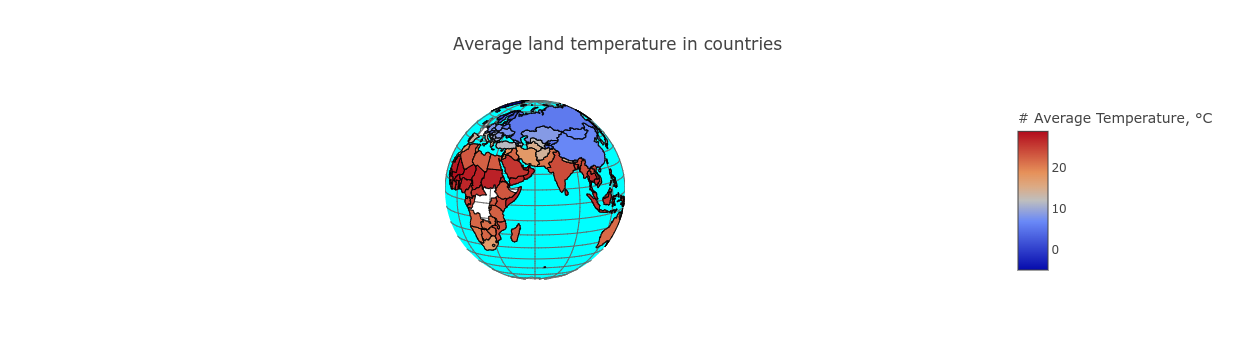

In [19]:
def test_map_temperature_by_country():
    dfc = get_preprocessed_data(global_data = False)
    map_fig = map_temperature_by_country(avg_temp_by_country(dfc))
    py.iplot(map_fig, validate=False, filename='worldmap')

test_map_temperature_by_country()

#### Average Temperature by Countries (Column Chart)
Map Chart gave a good overall insight when the comparison was to be made between neighbouring coutries. For a more global perspective, column chart would be more ideal as we would be able to make side by side comparison. Implement the function `column_temperature_by_country` that takes as input a sorted Series of average temperatures, indexed by country, and build a horizontal column chart for the 10 hottest countries, as well as a column chart for the 10 coldest countries.

---
**Plot rubric**

This question is manually graded. Your column chart should meet the following requirements:

* (1 point) The x-axis in each graph should capture the full range of temperature and be labeled as "Average Land Temperature".
* (2 points) The y-axis should have 10 countries sorted from high to low in temperature. It should be labeled as "Countries".
* (2 points) There should be 2 seperate graphs, one for the hot countries and one for the cold countries. They should be labeled as "Top 10 Hottest countries" and "Top 10 Coldest countries". The two graphs should be arranged side by side, with no overlap.

Here is the sample solution plot that you could try to replicate: [column_temperature_by_country.png](http://clouddatascience.blob.core.windows.net/m20-foundation-data-science/p2-domain-analysis-exploration/plots/column_temperature_by_country.png).

---

In [20]:
def column_temperature_by_country(average_temps):
    """
    Plot the average temperature of the top 10 hottest countries and top 10 coldest countries,
    each in a separate horizontal column chart.
    
    args:
        average_temps (pd.Series) : a series of average temperature values, sorted from
            high to low and indexed by country
    """
    hot_top10 = average_temps[:10].to_frame()
    cold_top10 = average_temps[-10:].to_frame()
    
    fig, axes = plt.subplots(1, 2, figsize = (25, 10), gridspec_kw = {'wspace': 0.6})
    axes[0].set_title("Top 10 Hottest Countries")
    sns.barplot(ax = axes[0], y = hot_top10.index, x = "AverageTemperature", data = hot_top10, color="r", orient = "h")
    axes[0].set_ylabel("Countries")
    axes[0].set_xlabel("Average Land Temperature")
    axes[0].grid()
    
    axes[1].set_title("Top 10 Coldest Countries")
    sns.barplot(ax = axes[1], y = cold_top10.index, x = "AverageTemperature", data = cold_top10, color="b", orient = "h")
    axes[1].set_ylabel("Countries")
    axes[1].set_xlabel("Average Land Temperature")
    axes[1].grid()

All tests passed!


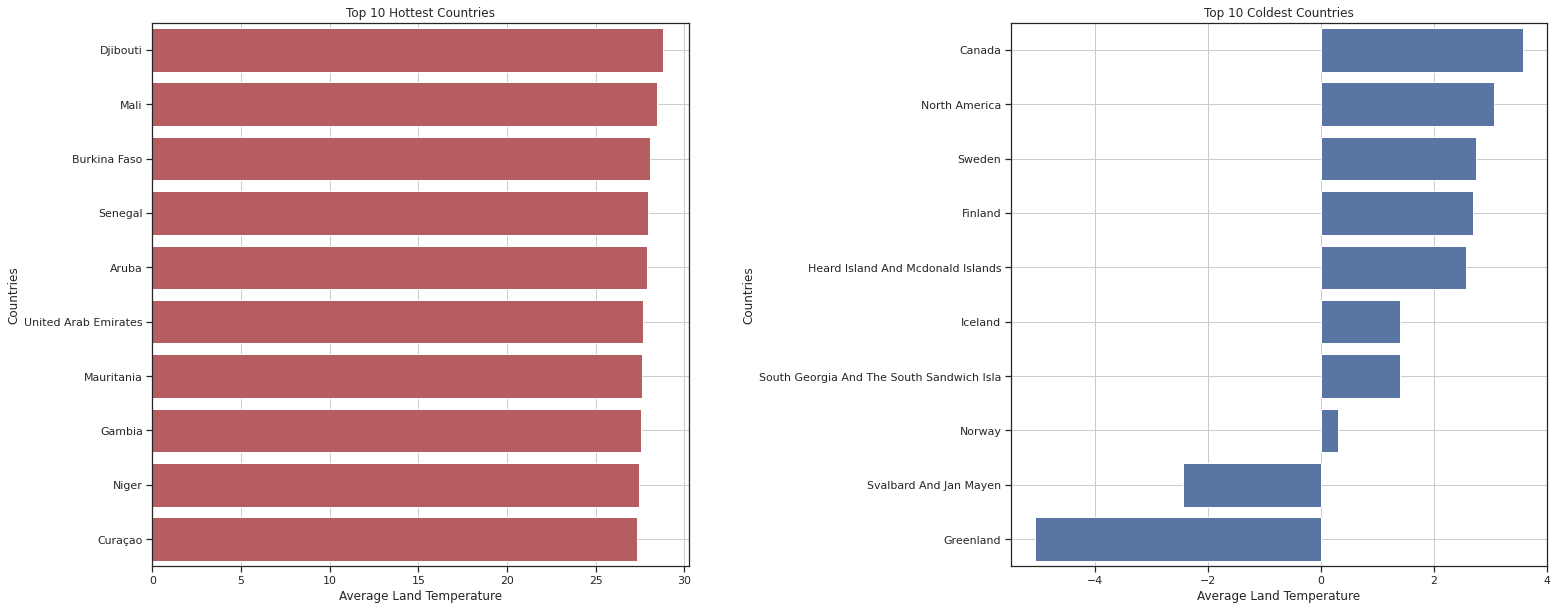

In [21]:
def test_column_temperature_by_country():
    dfc = get_preprocessed_data(global_data = False)
    column_temperature_by_country(avg_temp_by_country(dfc))
    print("All tests passed!")

test_column_temperature_by_country()

#### Average land temperature over the years by month
Another interesting visual to observe is the presence of global warming across the world. Has the average temperature increased in the most recent years? Are there differences across the months? To answer these questions, you should investigate the `df_global` dataframe and perform the followings:

1. Extract the month and year from the datetime `dt` column, then select only the rows that belong to the most recent `n_years` years.
2. Transform this subset of data so that the rows are indexed by month and the columns are the most recent `n_years` (eg 1966 to 2015 for `n_years` = 50).

Implement the `get_temp_by_month` function that performs the above steps.

**Note**:
* There are two different date formats used to represent the timestamps in the `dt` column of `df_global`.
* Each row in `df_global` represents one month.
* Use the `LandAverageTemperature` column to extract temperature data (note that there is no data aggregation in this case).
* The resulting dataframe should have `month` as index and `year` as columns.
* The year values are different in the secret dataset. Do not hard-code year numbers in your code.

In [22]:
def get_temp_by_month(df_global, n_years = 50):
    """
    Generates data for time series analysis using a heatmap for temperature changes over the most recent years
    
    args:
        df_global (pd.DataFrame) : DataFrame of global temperatures by continent
    kwargs:
        n_years (int) : the number of most recent years to consider
    
    returns:
        pd.DataFrame : a dataframe with average land temperature in each month (row index) in each year (column)
    """
    df = df_global.copy()
    df["dt"] = pd.to_datetime(df["dt"])
    df = df.set_index(df["dt"])
    df = df.last("{}Y".format(n_years))
    
    df["month"] = df["dt"].dt.month
    df["year"] = df["dt"].dt.year
    
    return pd.pivot_table(df, columns = "year", values = "LandAverageTemperature", index = "month")

In [23]:
def test_get_temp_by_month():
    dfg = get_preprocessed_data(country_data = False)
    df = get_temp_by_month(dfg)
    assert list(df.columns) == list(range(1966, 2016))
    assert df.index.name == "month"
    assert df.columns.name == "year"
    assert list(df.index) == list(range(1, 13))
    
    assert abs(df.loc[1, 1966] - 2.490) < 0.001
    assert abs(df.loc[12, 2015] - 5.518) < 0.001
    print("All tests passed!")

test_get_temp_by_month()

All tests passed!


We can now plot the temperature data over each month of the years 1966 - 2015 in a heatmap. To get the desired color scheme, you can set the parameter `cmap = "coolwarm"` in your matplotlib or seaborn function call.

---
**Plot rubric**

This question is manually graded. Your heatmap should meet the following requirements:

* (2 points) The x-axis should have each year from 1966 to 2015 and labeled as "year".
* (2 points) The y-axis should have each month from 1 to 12 and labeled as "month". 
    The header should be labeled as "Average Temperature for Calendar Months from 1966-2015".
* (1 point) Each cell should have it's own data value

Here is the sample solution plot that you could try to replicate: [heatmap_temp_over_time.png](http://clouddatascience.blob.core.windows.net/m20-foundation-data-science/p2-domain-analysis-exploration/plots/heatmap_temp_over_time.png).

---

In [24]:
def heatmap_temp_over_time(df_temp_by_month):
    """
    Plot the temperature data over each month of the years 1966 - 2015 in a heatmap, based on
    the preprocessed global temperature data.
    
    args:
        df_temp_by_month (pd.DataFrame) : a dataframe with average land temperature in each month (row index) in each year (column)
    """
    fig, axes = plt.subplots(figsize = (35, 15))
    sns.heatmap(df_temp_by_month, linewidths=1, annot=True, fmt=".1f", cmap="RdBu_r")
    axes.set_title("Average Temperature for Calendar Months from 1966-2015")
    axes.tick_params(axis='x', rotation=90)

All tests passed!


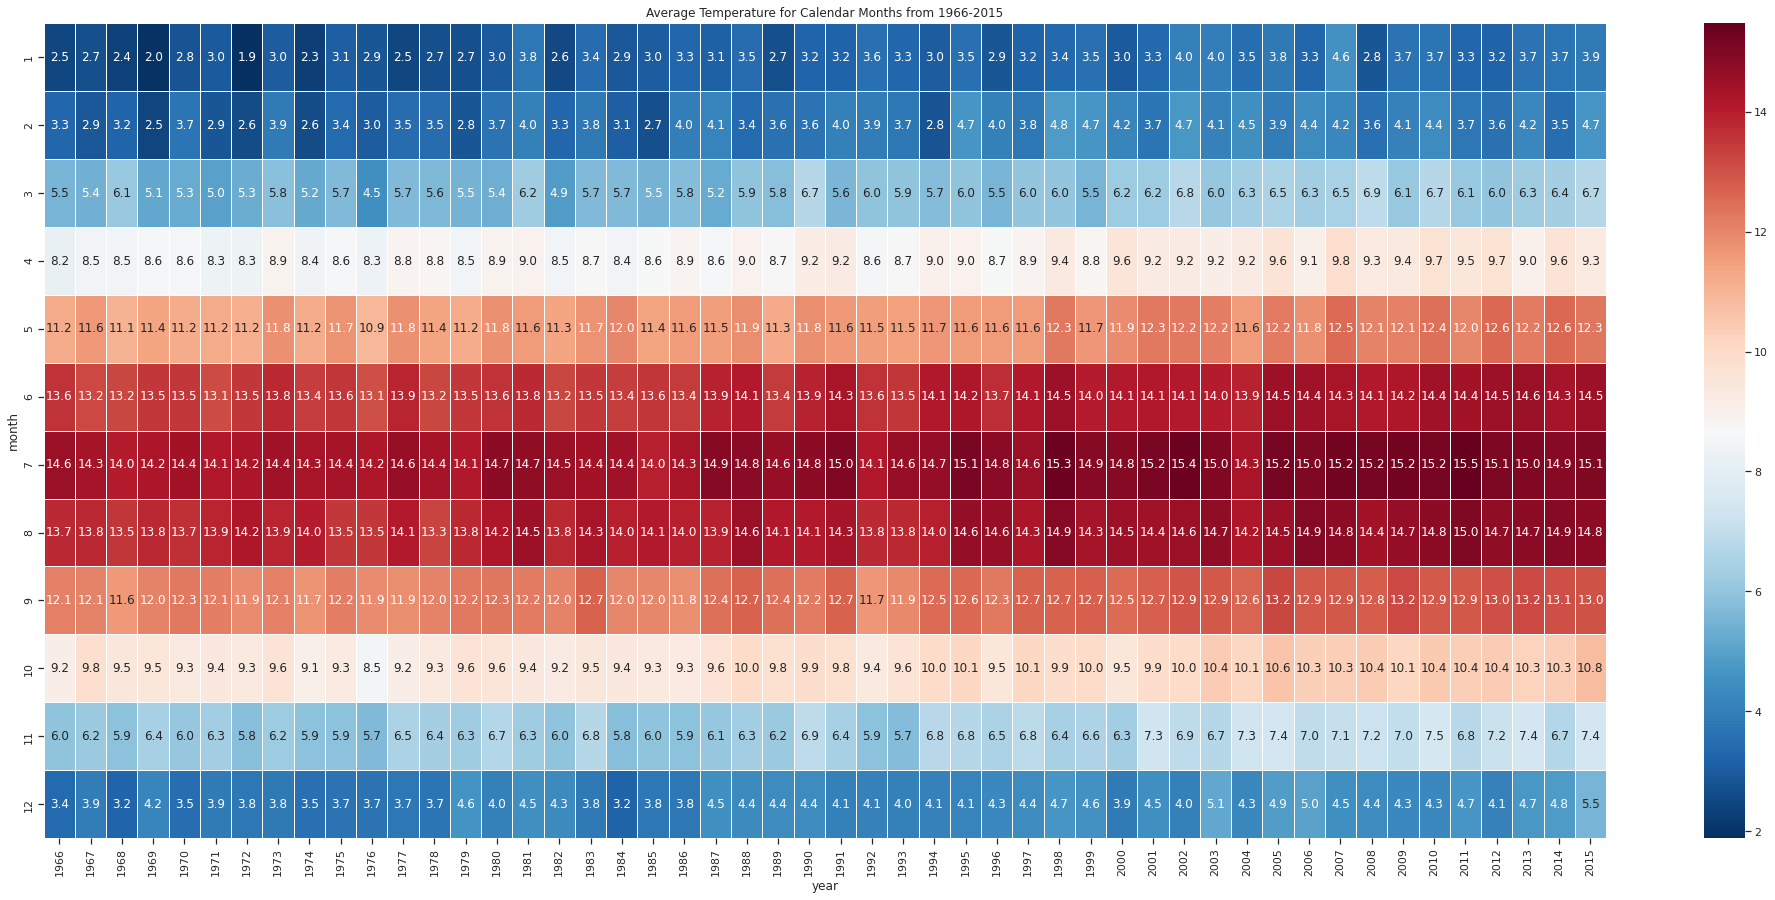

In [25]:
def test_heatmap_temp_over_time():
    dfg = get_preprocessed_data(country_data = False)
    df_temp_by_month = get_temp_by_month(dfg)
    heatmap_temp_over_time(df_temp_by_month)
    print("All tests passed!")

test_heatmap_temp_over_time()

We see that the temperature in each month in 2015 has increased considerably compared to that in 1966.

#### Time series of average temperature by country
Now, we will see how the average temperature has changed over time in each country. First, implement the function `time_series_temp_by_country` that returns a dataframe where:
1. The dataframe is indexed by `Year`, where the minimum year is 1743 and maximum year is 2013. Note that not all years in the range 1743 - 2013 are present.
1. The columns are all the country names in the cleaned and filtered temperature by country dataset.
1. Each cell denotes the average temperature of a country in a particular year. This data can be aggregated from the `AverageTemperature` column.

**Notes**:
* The year values are different in the secret dataset. Do not hardcode the year numbers in your code.

In [26]:
def time_series_temp_by_country(df_country_filtered):
    """
    Aggregate the temperature data by year in each country.
    
    args:
        df_country_filtered (pd.DataFrame) : the dataframe of temperature by country with country names
            filtered and empty rows removed
    
    returns:
        pd.DataFrame : a dataframe where each cell denotes the average temperature
        in a country (column) and a year (row index)
    """
    df = df_country_filtered.copy()
    df["dt"] = pd.to_datetime(df["dt"])
    df["year"] = df["dt"].dt.year
    df = df.groupby(["Country", "year"]).agg({"AverageTemperature": np.mean})
    df = pd.pivot_table(df, index = "year", columns = "Country", values = "AverageTemperature")
    df.index.name = "Year"
    return df

In [27]:
def test_time_series_temp_by_country():
    dfc = get_preprocessed_data(global_data = False)
    df_temp_agg_by_country = time_series_temp_by_country(dfc)
    # the indexes are all the years from 1743 to 2013 except 4 missing years
    assert set(range(1743, 2014)) - set(df_temp_agg_by_country.index) == {1746, 1747, 1748, 1749}
    assert df_temp_agg_by_country.index.name == "Year"
    
    # the columns are all the countries in sorted order
    assert list(df_temp_agg_by_country.columns) == sorted(dfc["Country"].unique())
    assert df_temp_agg_by_country.columns.name == "Country"
    
    # check values for one country
    country = df_temp_agg_by_country["Afghanistan"]
    assert all(np.isnan(x) for x in country[1743:1840])
    assert np.allclose(country.loc[1841:1846], [13.9976, 15.1546, 13.7563, 13.1488, 13.3058, 14.0308]) 
    print("All tests passed!")

test_time_series_temp_by_country()

All tests passed!


We can now visualize the temperature changes across given countries over the years. Implement the function `lineplot_temp_by_country` that shows the time series temperature data of given countries using line plots. The input to this function will be the output of `time_series_temp_by_country` that you implemented earlier, and a list of countries to visualize.

---
**Plot rubric**

This question is manually graded. Your lineplot should meet the following requirements:

* (1 point) The x-axis should be years from 1743 to 2013. It should be labled as "Year".
* (1 point) The y-axis should be average temperature (covering all possible values from the dataset, without hardcoding a limit). It should be labeled as "Average Temperature (C)".
* (2 points) All the country lines should be plotted together on the same plot.
* (1 point) Each country should have its own label in a legend box

Here is the sample solution plot that you could try to replicate: [lineplot_temp_by_country.png](http://clouddatascience.blob.core.windows.net/m20-foundation-data-science/p2-domain-analysis-exploration/plots/lineplot_temp_by_country.png).

---

In [28]:
def lineplot_temp_by_country(df_temp_agg, countries):
    """
    Visualize the time series temperature data over the years of given countries using line plots
    
    args:
        df_temp_agg (pd.DataFrame) : a dataframe where each cell denotes the average temperature
        in a country (column) and a year (row index)
        countries (List[Str]) : a list of countries to select from df_temp_agg and visualize
    """
    fig, axes = plt.subplots(figsize = (20, 10))
    axes.set_title("Average Temperature in {} from 1743 to 2013".format(",".join(countries)))
    axes.set_xlim(xmin=1743, xmax=2013)
    for column in countries:
        sns.lineplot(x = df_temp_agg.index, y = df_temp_agg[column], label = column)
    axes.set_ylabel("Average Temperature (C)")
    axes.grid(True)
    axes.legend()

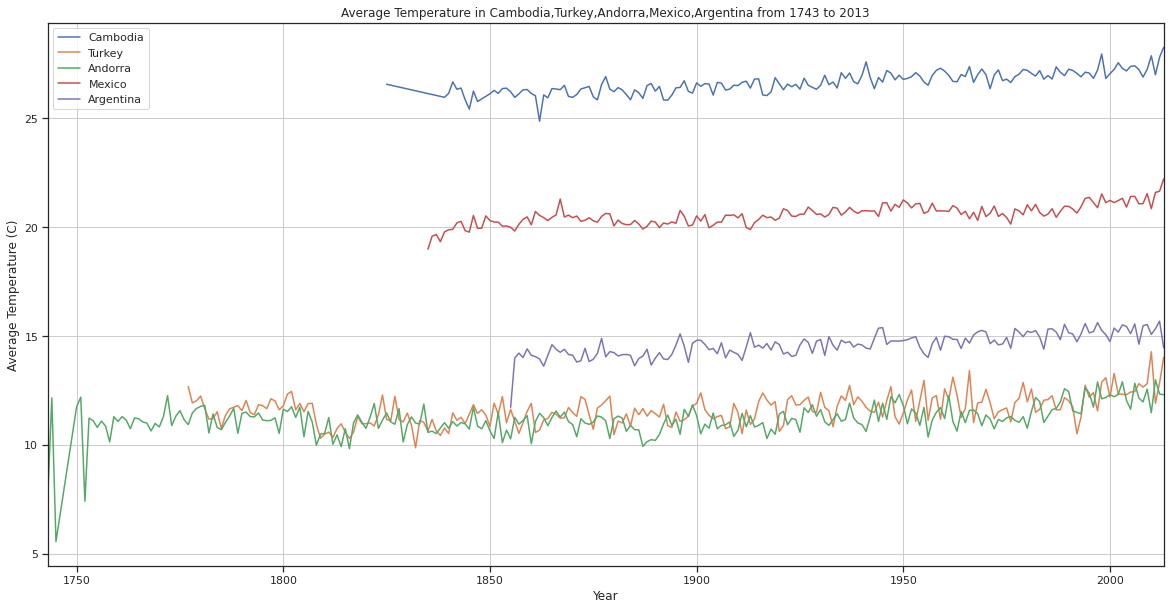

In [29]:
def test_lineplot_temp_by_country():
    dfc = get_preprocessed_data(global_data = False)
    df_temp_agg = time_series_temp_by_country(dfc)
    lineplot_temp_by_country(df_temp_agg, ['Cambodia','Turkey','Andorra','Mexico','Argentina'])

test_lineplot_temp_by_country()

We see that starting from the 1980s, there is a clear trend of the average temperatures over the world rising. There are, of course, many factors that contribute to this global warming trend. In this project we will investigate one potential factor -- food production. You will perform similar exploratory data analysis on a food production dataset in Part B, and examine some correlation between the temperature and food production dataset in Part C.

## Part B: Worldwide Food Production Data
The dataset we will use is from the [FAO](http://www.fao.org/faostat/en/#home)'s database is the Food Balance Sheets, which presents denotes several countries' food supply during a particular period. The food balance sheet shows, for each food item, its supply sources and utilization. There are two types of utilization that we are interested in:

* `Food` refers to the total amount of the food item available as human food during the reference period.
* `Feed` refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period.

Let's start by loading the dataset and viewing the headers.

In [30]:
df_food_production = pd.read_csv("input/FAO.csv")

The crux of this dataset lies in the numerical values in columns `Y1961` to `Y2013` -- these denote the amount of `Food` or `Feed` items in an area during a particular year. Similar to Part A, we can understand the scope of the data by looking at the summary statistics:

In [31]:
# this cell has been tagged with excluded_from_script
# you do not need to remove it when submitting
display(df_food_production.head())
display(df_food_production.describe())

Area Abbreviation  Area Code         Area  Item Code  \
0               AFG          2  Afghanistan       2511   
1               AFG          2  Afghanistan       2805   
2               AFG          2  Afghanistan       2513   
3               AFG          2  Afghanistan       2513   
4               AFG          2  Afghanistan       2514   

                       Item  Element Code Element         Unit  latitude  \
0        Wheat and products          5142    Food  1000 tonnes     33.94   
1  Rice (Milled Equivalent)          5142    Food  1000 tonnes     33.94   
2       Barley and products          5521    Feed  1000 tonnes     33.94   
3       Barley and products          5142    Food  1000 tonnes     33.94   
4        Maize and products          5521    Feed  1000 tonnes     33.94   

   longitude  ...   Y2004   Y2005   Y2006   Y2007   Y2008   Y2009   Y2010  \
0      67.71  ...  3249.0  3486.0  3704.0  4164.0  4252.0  4538.0  4605.0   
1      67.71  ...   419.0   445.0   546.0   455.0   490.0   415.0   442.0   
2      67.71  ...    58.0   236.0   262.0   263.0   230.0   379.0   315.0   
3      67.71  ...   185.0    43.0    44.0    48.0    62.0    55.0    60.0   
4      67.71  ...   120.0   208.0   233.0   249.0   247.0   195.0   178.0   

    Y2011  Y2012  Y2013  
0  4711.0   4810   4895  
1   476.0    425    422  
2   203.0    367    360  
3    72.0     78     89  
4   191.0    200    200  

[5 rows x 63 columns]

Area Code     Item Code  Element Code      latitude     longitude  \
count  21484.000000  21484.000000  21484.000000  21484.000000  21484.000000   
mean     125.436744   2694.217464   5211.682089     20.449496     15.808392   
std       72.872877    148.981623    146.815944     24.628069     66.008906   
min        1.000000   2511.000000   5142.000000    -40.900000   -172.100000   
25%       63.000000   2561.000000   5142.000000      6.430000    -11.780000   
50%      120.000000   2640.000000   5142.000000     20.590000     19.150000   
75%      188.000000   2782.000000   5142.000000     41.150000     46.870000   
max      276.000000   2961.000000   5521.000000     64.960000    179.410000   

               Y1961          Y1962          Y1963          Y1964  \
count   17945.000000   17945.000000   17945.000000   17945.000000   
mean      196.105043     201.755141     206.579493     211.157537   
std      1866.560537    1887.503476    1865.495276    1867.257111   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%        21.000000      22.000000      23.000000      24.000000   
max    112227.000000  109130.000000  106356.000000  104234.000000   

               Y1965  ...          Y2004          Y2005          Y2006  \
count   17945.000000  ...   21135.000000   21135.000000   21380.000000   
mean      219.036890  ...     491.256967     497.606388     500.829888   
std      2022.222496  ...    5039.046223    5136.130128    5170.520211   
min         0.000000  ...       0.000000       0.000000       0.000000   
25%         0.000000  ...       0.000000       0.000000       0.000000   
50%         1.000000  ...       6.000000       6.000000       7.000000   
75%        25.000000  ...      75.000000      77.000000      78.000000   
max    119378.000000  ...  360767.000000  373694.000000  388100.000000   

               Y2007          Y2008          Y2009          Y2010  \
count   21380.000000   21380.000000   21380.000000   21380.000000   
mean      512.932647     527.232086     528.914406     539.847708   
std      5332.639870    5527.882650    5575.132172    5750.001208   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         7.000000       7.000000       7.000000       7.000000   
75%        80.000000      82.000000      83.000000      83.000000   
max    402975.000000  425537.000000  434724.000000  451838.000000   

               Y2011          Y2012          Y2013  
count   21380.000000   21484.000000   21484.000000  
mean      557.818616     565.010101     580.017781  
std      5912.062002    6076.310453    6246.265926  
min         0.000000    -169.000000    -246.000000  
25%         0.000000       0.000000       0.000000  
50%         8.000000       8.000000       8.000000  
75%        86.000000      88.000000      90.000000  
max    462696.000000  479028.000000  489299.000000  

[8 rows x 58 columns]

Note that, while we expect the `Food` and `Feed` amount to be positive, the minimum values in the columns `Y2012` and `Y2013` are negative -- these are outliers which we have to remove. On the other hand, from the output of `.head()` we also noticed that the production values in the columns from year columns until "Y2011" are floating numbers, while those in "Y2012" and "Y2013" are integers. This difference in data type is indicative of a missing (`np.nan`) value somewhere in these columns:

In [32]:
# this cell has been tagged with excluded_from_script
# you do not need to remove it when submitting
print("Columns with nan values:")
print([col for col in df_food_production.columns if df_food_production[col].isnull().any()])

Columns with nan values:
['Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011']


It was indeed the case that all the years from 1961-2011 have missing data. This brings us to our first task.

### Question 4: Food data cleaning
Let's perform a similar data cleaning task as in Part A. Implement the function `clean_food_data` that performs the followings:

1. Remove duplicate rows in the dataset (if some rows have the same value in every column, we only keep the first occurence).
1. Replace the negative entries in all the year columns with 0.
1. Fill in the missing cells with 0 across all columns.
1. Convert all the year columns to datatype `np.int64`.

**Notes**:
* The year values are different in the secret dataset. Do not hard-code the year numbers in your code.

In [33]:
def get_cleaned_food_data(df = df_food_production):
    """
    Clean the food production dataset by removing duplicates and replacing outlier / missing values with 0.
    
    kwargs:
        df (pd.DataFrame) : the food production dataframe.
    
    return:
        pd.DataFrame : the cleaned dataframe
    """
    year_col_regex = re.compile(r"^Y[0-9]{4}$")
    df = df.drop_duplicates(keep = "first")
    year_columns = [col for col in df.columns if year_col_regex.match(col)]
    tmp = df.loc[:, year_columns]
    tmp[tmp < 0] = 0
    df.loc[:, year_columns] = tmp
    df.fillna(0, inplace = True)
    df[year_columns] = df[year_columns].astype(np.int64)
    return df

In [34]:
def test_get_cleaned_food_data():
    df_food_cleaned = get_cleaned_food_data()
    assert list(df_food_cleaned.index) == list(range(21477))
    assert df_food_cleaned.columns.equals(df_food_production.columns)
    
    for i in range(1961, 2014):
        assert df_food_cleaned[f"Y{i}"].dtype == np.int64

    assert df_food_cleaned.isnull().sum().sum() == 0
    assert df_food_cleaned["Y2012"].min() == df_food_cleaned["Y2013"].min() == 0
    assert df_food_cleaned.loc[21475, "Y2011"] == 0
    assert df_food_cleaned.loc[0, "Y2004"] == 3249
    assert df_food_cleaned.loc[3, "Y2013"] == 89
    print("All tests passed!")
    
test_get_cleaned_food_data()

All tests passed!


### Question 5: Food data visualization
We will now visualize the data using different types of charts from the [visual vocabulary](https://github.com/ft-interactive/chart-doctor/tree/master/visual-vocabulary). As you work through the following sections, think about which type of chart is most useful to the question at hand. Developing a good set of visualization heuristics is a crucial skill to master.

#### Ranking countries by human food production
We start by comparing the human food production amount of different countries in a particular year. Implement the function `top_countries_by_production` that computes the total food production of each country and returns a Series of the top production amount, ordered from highest to lowest. This Series should be indexed by `Country`.

**Note**:
* To compute the total human food production of a country, sum over the rows where the `Element` is `Food` and the `Area` is that country.
* The returned Series should be named based on year column used for data aggregation. For example, if the input `year` is 2011, the name of the returned Series should be `"Y2011"`.

In [35]:
def top_countries_by_production(df_food_cleaned, year, size = 10):
    """
    Get a data frame of the top countries with the highest total human food production, ordered from highest to lowest.
    
    args:
        df_food_cleaned (pd.DataFrame) : the cleaned food production data
        year (int) : the year to compare countries in
        
    kwargs:
        size (int) : the number of top countries to consider
    
    return:
        pd.Series[np.int64] : a sorted series of the top food production amount, indexed by country
    """
    year_f = "Y{}".format(year)
    df = df_food_cleaned[df_food_cleaned["Element"] == "Food"]
    df = df.filter(["Area", year_f])
    df = df.groupby(["Area"]).agg({year_f: np.sum}).sort_values(by = [year_f], ascending = False)
    df_s = df[year_f][:size]
    df_s.index.name = "Country"
    return df_s

In [36]:
def test_top_countries_by_production():
    df_food_cleaned = get_cleaned_food_data()
    top_food_production = top_countries_by_production(df_food_cleaned, 2013)
    assert top_food_production.dtype == np.int64
    assert top_food_production.name == "Y2013"
    assert list(top_food_production.index) == [
        'China', 'India', 'United States Of America', 'Brazil',
        'Russian Federation', 'Indonesia', 'Nigeria', 'Pakistan', 'Mexico', 'Germany'
    ]
    assert top_food_production.index.name == "Country", top_food_production.index.name
    assert list(top_food_production) == [2499252, 1238335, 641776, 312488, 253892, 237826, 228877, 180994, 166591, 158473]
    print("All tests passed!")

test_top_countries_by_production()

All tests passed!


Now we can plot country-wise human food production quantity in a bar plot.

---
**Plot rubric**

Your barplot should meet the following requirements:

* (2 points) The x-axis should list all top 10 country's name with sufficient spacing so that the names are readable. It should be labeled as "Country".
* (2 points) The y-axis should be the food production quantity.
* (1 point) The graph should be a vertical bar plot. The title of the graph should be "Top countries by food production".

Here is the sample solution plot that you could try to replicate: [barplot_human_food_production_by_country.png](http://clouddatascience.blob.core.windows.net/m20-foundation-data-science/p2-domain-analysis-exploration/plots/barplot_human_food_production_by_country.png).

---

In [37]:
def barplot_human_food_production_by_country(top_food_production):
    """
    Construct barplot for human food production values of the top 10 countries.
    
    args:
        top_food_production (pd.Series[np.int64]) : a sorted series of the top food production amount, indexed by country
    """
    fig, axes = plt.subplots(figsize = (20, 10))
    axes.set_title("Top countries by food production")
    sns.barplot(x = top_food_production.index, y = top_food_production.values)
    axes.set_xlabel("Country")
    axes.set_ylabel(top_food_production.name)
    axes.ticklabel_format(style="plain", axis = "y")
    axes.grid(axis="y")

All tests passed!


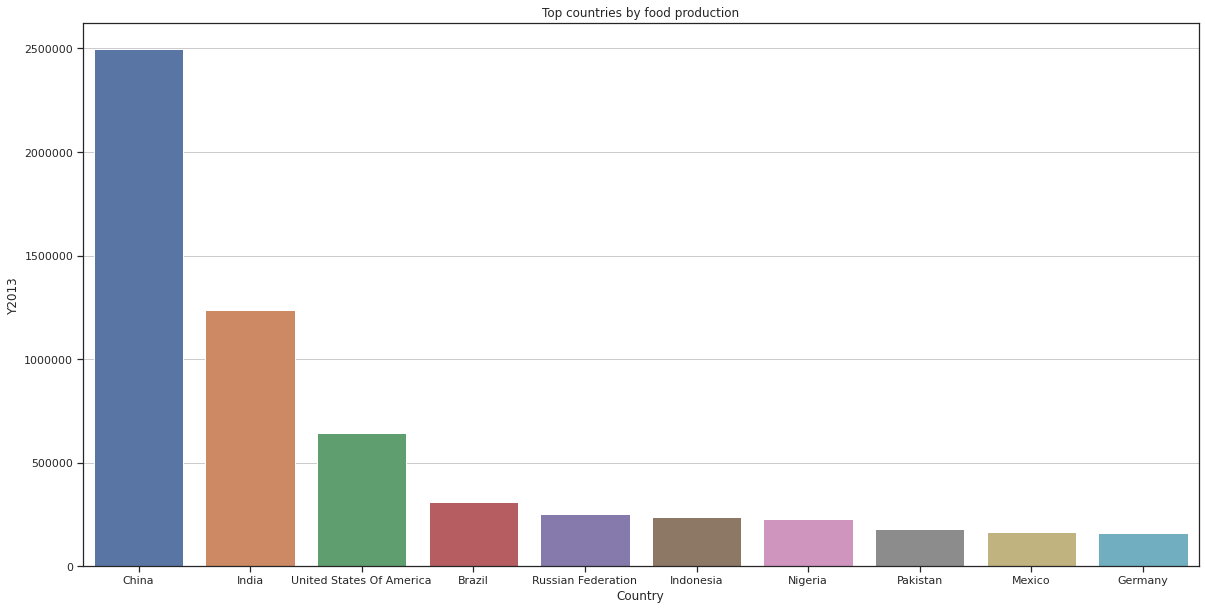

In [38]:
def test_barplot_human_food_production_by_country():
    df_top_countries = top_countries_by_production(get_cleaned_food_data(), 2013)
    barplot_human_food_production_by_country(df_top_countries)
    print("All tests passed!")

test_barplot_human_food_production_by_country()

We see that the [countries with the highest population](https://www.countries-ofthe-world.com/most-populous-countries.html) tend to also have the highest human food production amount, although Bangladesh is an interesting exception (it is the 8th most populated country but is not present in this chart).

## Part C: Correlate Climate Change and Food Production

In order to visualize the correlations between temperature change and food productions, we have to first aggregate the temperature and food production by country.

### Question 6: Aggregate food production by year
Implement the function `aggregate_food_data` that returns a dataframe where:
1. The dataframe is indexed by `Year`, which contains integer values from 1961 - 2013 inclusive.
1. The columns are the 174 country names.
1. Each cell denotes the total food production (including both `Food` and `Feed`) of a country in a particular year.

**Note**:
* The index column with the year should be named `Year` and have type integer. In other words, its data should be `[1961, 1962, ...]`, instead of `["Y1961", "Y1962", "Y1963", ...]`.
* The year values are different in the secret dataset. Do not hard-code any year number in your code.
* Here is the expected schema of the returned dataframe. Note that `Year` is placed below the countries to indicate that it is an index and not a column (you will see a similar alignment when you print your dataframe).

<br>

| Country | Afganishtan 	| Albania 	| Algeria 	| ... 	| Yemen 	| Zambia 	| Zimbabwe 	|
|------	|-------------	|---------	|---------	|-----	|-------	|--------	|----------	|
| **Year** 	|             	|         	|         	|     	|       	|        	|          	|
| **1961** 	|             	|         	|         	|     	|       	|        	|          	|
| **1962** 	|             	|         	|         	|     	|       	|        	|          	|
| ...  	|             	|         	|         	|     	|       	|        	|          	|
| **2012** 	|             	|         	|         	|     	|       	|        	|          	|
| **2013** 	|             	|         	|         	|     	|       	|        	|          	|

In [39]:
def aggregate_transpose_farming_data(df_food_cleaned):
    """
    Compute the total Food and Feed production per country per year
    
    args:
        df_food_cleaned (pd.DataFrame) : the cleaned food production data
    
    return:
        pd.DataFrame : a dataframe where each cell denotes the total food production
        of a country (column) in a year (row index). 
    """ 
    year_col_regex = re.compile(r"^Y[0-9]{4}$")
    def col_converter(name):
        return int(name[1:])
    
    columns = [col for col in df_food_cleaned.columns if year_col_regex.match(col)]
    columns.append("Area")
    df = df_food_cleaned.filter(columns)
    df = df.groupby(["Area"]).sum()
    df.index.name = "Country"
    
    df = df.rename(columns = col_converter)
    df = pd.pivot_table(df, values = df.columns, columns = df.index)
    df.index.name = "Year"
    
    return df

In [40]:
def test_aggregate_transpose_farming_data():
    df_food_cleaned = get_cleaned_food_data()
    df_food_agg = aggregate_transpose_farming_data(df_food_cleaned)
    countries = df_food_cleaned["Area"].unique()
    
    # the year indexes are from 1961 to 2013
    assert list(df_food_agg.index) == list(range(1961, 2014))
    assert df_food_agg.index.name == "Year"
    assert df_food_agg.index.dtype == np.int64
    
    # the column names are all the countries
    assert sorted(df_food_agg.columns) == sorted(countries)
    assert df_food_agg.columns.name == "Country"
    for col in df_food_agg.columns:
        assert df_food_agg[col].dtype == np.int64
    
    # check the aggregation
    assert df_food_agg.loc[1965, "Australia"] == 28961
    assert df_food_agg.loc[1971, "United States Of America"] == 678905
    print("All tests passed!")

test_aggregate_transpose_farming_data()

All tests passed!


### Question 7: Merge temperature and food production data
Now, we can retrieve the temperature and food production data for a given country and merge them into a single data frame, using the common integer years between the two dataset as index. Implement the function `merge_temperature_food_data` that performs this task.

**Note**:
* Only the years that are present in both the temperature and food datasets should be included in the merged dataset.
* The returned data frame should be indexed by `Year` and have two columns: `Average Temperature` and `Total Food Production`.
* No data aggregation is needed in this task.

In [41]:
def merge_temperature_food_data(df_temp_agg, df_food_agg, country):
    """
    Merge the average temperature and total food production dataset.
    
    args:
        df_temp_agg (pd.DataFrame) : a dataframe where each cell denotes the average temperature
            in a country (row) and a year (column)
        df_food_agg (pd.DataFrame) : a dataframe where each cell denotes the total food production
            of a country (column) in a year (row index)
        country (str) : the country whose data should be merged
    
    return:
        pd.DataFrame : a dataframe with data about average temperature and food production per country per year
    """
    df_temp = df_temp_agg.loc[:, country].to_frame()
    df_food = df_food_agg.loc[:, country].to_frame()
    
    res = df_temp.merge(df_food, how="inner", left_index=True, right_index=True)
    res = res.rename(columns={"{}_x".format(country): "Average Temperature", "{}_y".format(country): "Total Food Production"})
    return res

In [42]:
def test_merge_temperature_food_data():
    dfc = get_preprocessed_data(global_data = False)
    df_temp_agg = time_series_temp_by_country(dfc)
    df_food_agg = aggregate_transpose_farming_data(get_cleaned_food_data())
    df_merged = merge_temperature_food_data(df_temp_agg, df_food_agg, "India")
    
    assert list(df_merged.index) == list(range(1961, 2014))
    assert list(df_merged.columns) == ["Average Temperature", "Total Food Production"]
    assert df_merged["Average Temperature"].dtype == np.float64
    assert df_merged["Total Food Production"].dtype == np.int64
    assert df_merged.index.name == "Year"
    assert np.allclose(df_merged.loc[1961:1965, "Total Food Production"], [309565.0, 318802.0, 315155.0, 324564.0, 327376.0])
    assert np.allclose(df_merged.loc[1961:1965, "Average Temperature"], [23.81525, 23.88475, 24.09575, 24.07050, 24.09092])
    print("All tests passed!")

test_merge_temperature_food_data()

All tests passed!


With this merged dataset, we can now visualize the time series of both average temperature and total food production over the years in the same plot to see their correlation. Implement the function `plot_temperature_food_production` that visualizes the average temperature and food production of a given country over the years.

---
**Plot rubric**

Your line chart should meet the following requirements:

* (1 point) The x-axis should display full year range. It should be labeled as "Years".
* (1 point) There should be two y-axes on the left and right side of the plot and they share the same x-axis.
* (1 point) One of the y-axis should display the average temperature and another should display total food production. They should be labeled as "Average Temperature" and "Total Food Production".
* (1 point) The color of a lineplot should be consistent with that of the corresponding y-axis. For instance, if the blue lineplot represents food production, then the y-axis that depects food production values should also be blue.
* (1 point) The title should be 'Average Temperature vs Total Food Production over the years in `country`', where `country` is the name of the input country.

Here is the sample solution boxplot that you could try to replicate: [plot_temperature_food_production.png](http://clouddatascience.blob.core.windows.net/m20-foundation-data-science/p2-domain-analysis-exploration/plots/plot_temperature_food_production.png).

---

In [43]:
def plot_temperature_food_production(df_temperature_food, country):
    """
    Plot the time series of temperature and food production values in a given country over the years.
    
    args:
        df_temperature_food (pd.DataFrame) : a dataframe with data about average temperature and food production per country per year
        country (str) : the name of the country whose data is being visualized
    """
    fig, axes = plt.subplots(figsize=(15, 10))
    axes.set_title("Average Temperature vs Total Food Production over the years in {}".format(country))
    axes.set_xlabel("Years")
    axes.set_ylabel("Average Temperature", color="red")
    axes.tick_params(axis='y', labelcolor="red", labelsize=15)
    axes.grid()
    sns.lineplot(x=df_temperature_food.index, y=df_temperature_food["Average Temperature"], color="r")
    
    axes2 = axes.twinx()
    axes2.set_ylabel("Total Food Production", color="blue")
    axes2.ticklabel_format(style="plain", axis="y")
    axes2.tick_params(axis='y', labelcolor="blue", labelsize=15)
    sns.lineplot(x=df_temperature_food.index, y=df_temperature_food["Total Food Production"], color="b", ax=axes2)

Pearson correlation                        Average Temperature  Total Food Production
Average Temperature               1.000000               0.717401
Total Food Production             0.717401               1.000000
Pearson correlation                        Average Temperature  Total Food Production
Average Temperature               1.000000               0.749992
Total Food Production             0.749992               1.000000
Pearson correlation                        Average Temperature  Total Food Production
Average Temperature               1.000000               0.695235
Total Food Production             0.695235               1.000000


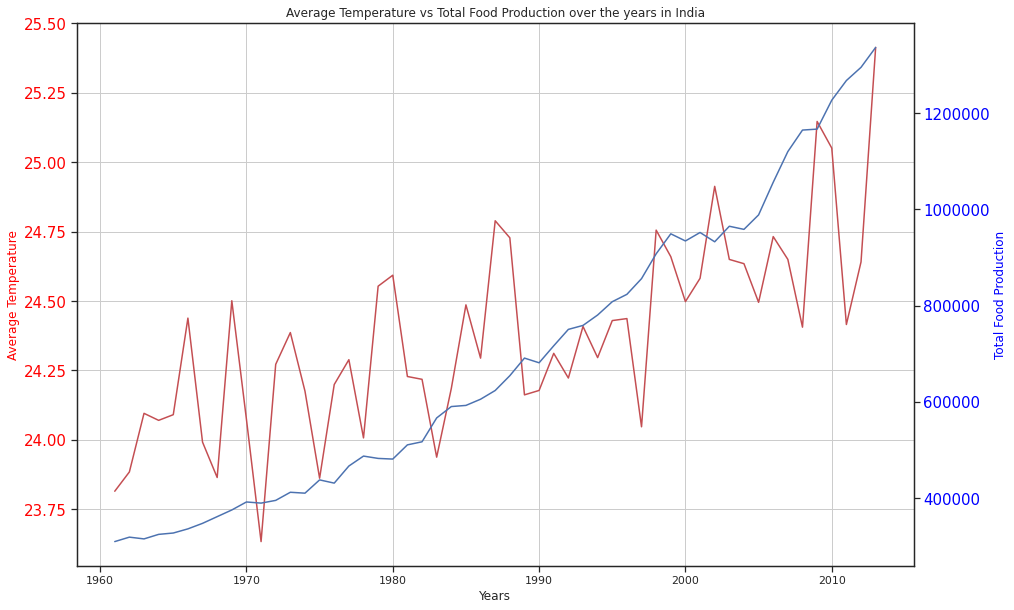

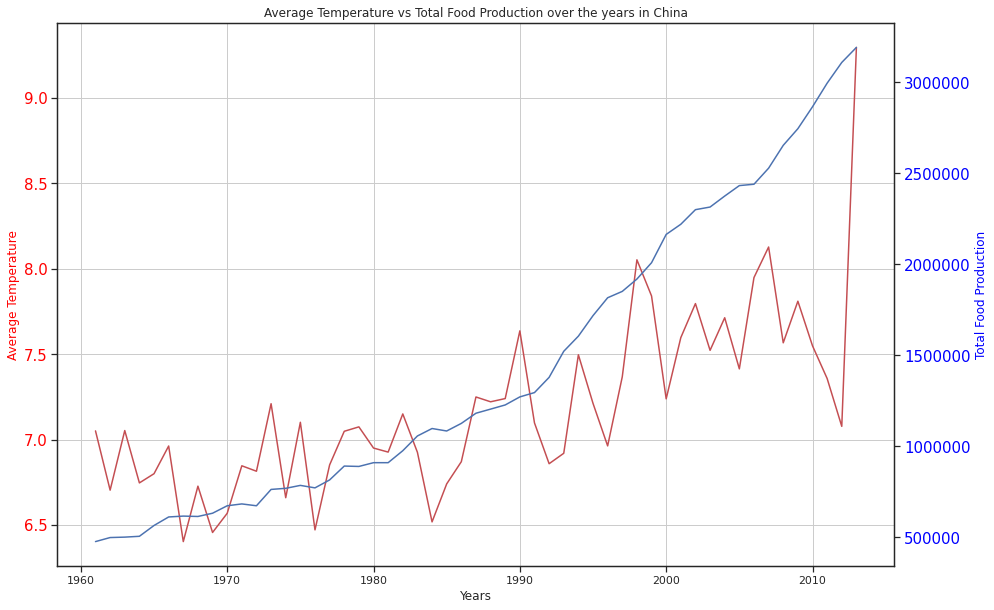

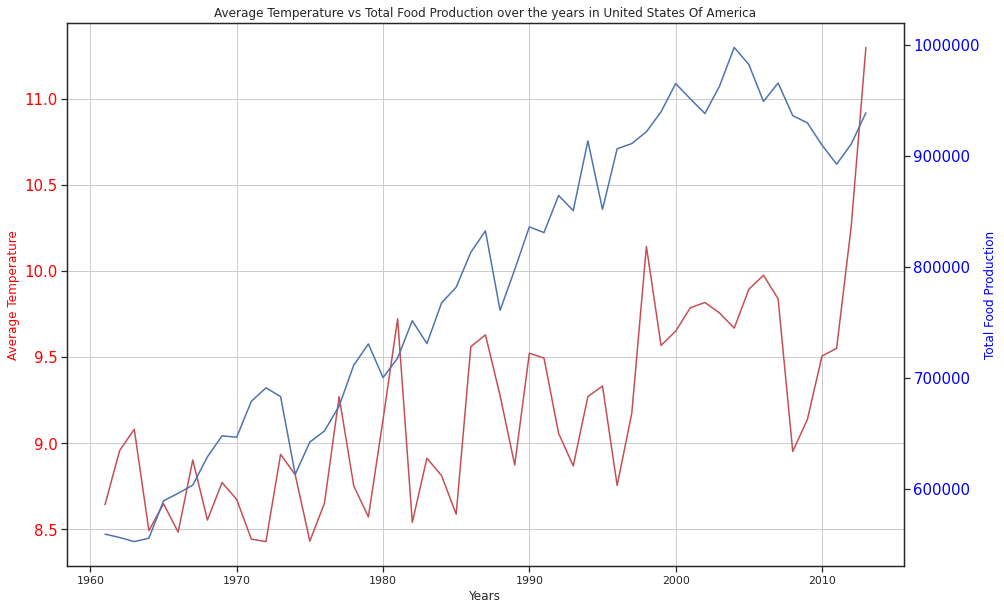

In [44]:
def test_plot_temperature_food_production():
    df_temp_agg = time_series_temp_by_country(drop_missing_values(preprocess_countries(df_country)))
    df_food_agg = aggregate_transpose_farming_data(get_cleaned_food_data())
    df_temperature_food = merge_temperature_food_data(df_temp_agg, df_food_agg, "India")
    plot_temperature_food_production(df_temperature_food, "India")
    print("Pearson correlation", df_temperature_food.corr())
    
    df_temperature_food = merge_temperature_food_data(df_temp_agg, df_food_agg, "China")
    plot_temperature_food_production(df_temperature_food, "China")
    print("Pearson correlation", df_temperature_food.corr())
    
    df_temperature_food = merge_temperature_food_data(df_temp_agg, df_food_agg, "United States Of America")
    plot_temperature_food_production(df_temperature_food, "United States Of America")
    print("Pearson correlation", df_temperature_food.corr())

test_plot_temperature_food_production()

We see that both average temperature and total food production have a tendency to rise together over the years, although food production rises in a much smoother manner. To quantify their relationship, we can also compute the Pearson between the `Average Temperature` and `Total Food Production` columns in the dataset of each country. We see that in the three countries examined above, the correlation coefficients are around 0.7, indicating a high degree of correlation.

Recall from the [data visualization primer](https://nbviewer.jupyter.org/url/clouddatascience.blob.core.windows.net/primers/p2-data-visualization-primer/data_visualization_primer.ipynb) that two variables increasing together does not necessarily imply a meaningful relationship between them, so our next step would be to do an online search to find related evidence. As it turns out, climate change and agriculture do have [strong influences on each other](https://en.wikipedia.org/wiki/Climate_change_and_agriculture), so the insights we gained from this analysis is valid. 

In [45]:
pd.__version__

'1.3.3'